In [1]:
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt

In [ ]:
#LD_wards=gpd.read_file("data/LD_boundary/London-wards-2018_ESRI/London_Ward_CityMerged.shp")
#london=LD_wards.unary_union
#london_gdf=gpd.GeoSeries(london)
#london_gdf.to_file('data/london_boundary.shp')

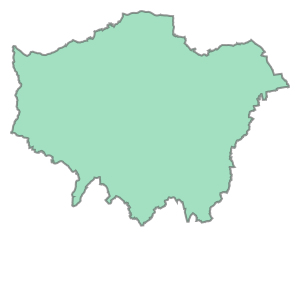

In [2]:
london_gdf = gpd.read_file('data/london_boundary.shp')
london = london_gdf.loc[0, 'geometry']
london

In [3]:
london.bounds

(503568.1995818045, 155850.79750088477, 561957.4961511316, 200933.90260989557)

In [ ]:
'''
for typ in ['RoadLink', 'RoadNode', 'MotorwayJunction']:
    exec("%s = gpd.GeoDataFrame()"%typ)
    for tile in ['SP_','SU_','TL_','TQ_']:
        path = "data/oproad_essh_gb/data/%s%s.shp"%(tile, typ)
        exec("%s%s = gpd.read_file(path)"%(tile, typ))
        exec("%s = %s.append(%s%s, ignore_index=True)"%(typ, typ, tile, typ))
'''

In [ ]:
'''
spatial_index = RoadLink.sindex
bbox = london.bounds
sidx = list(spatial_index.intersection(bbox))
RoadLink_sub = RoadLink.iloc[sidx]

RoadLink_clip = RoadLink_sub.copy()
RoadLink_clip['geometry'] = RoadLink_sub.intersection(london)
'''

In [ ]:
'''
RoadLink_clip = RoadLink_clip.reset_index(drop=True)
Rd = RoadLink_clip[RoadLink_clip['geometry'] != RoadLink_clip.loc[0, 'geometry']].reset_index(drop=True)
Rd.head()
'''

In [ ]:
#Rd.to_file('data/london_Road.shp')

In [ ]:
Rd = gpd.read_file('data/london_Road.shp')

In [ ]:
Rd.head()

In [ ]:
Rd['class'].unique()

In [ ]:
AQMS_gdf = gpd.read_file('data/AQMS_loc.shp')
AQMS_gdf

In [ ]:
fig,ax=plt.subplots(1,figsize=(15,12))

london_gdf.plot(color='lightgrey',ax=ax)

Gsp.plot(color='green',alpha=0.7,ax=ax,linewidth=0)

Rd.plot(edgecolor='black',linewidth=0.05,ax=ax)

AQMS_gdf.plot(marker='^',color='blue',ax=ax,label='Air Quality Monitoring Sites')

ax.axis('off')
legend=ax.legend(loc='lower right',shadow=True,fontsize=13)

#plt.savefig('sample.png',dpi=400,facecolor='black')
plt.show()